<a href="https://colab.research.google.com/github/gmm39/CS4410_GMcKenzie/blob/main/Homework5_GMcKenzie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gage McKenzie\
CS4410\
Homework 5

In [65]:
# 1
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
# Load irisi dataset
iris = load_iris()

In [67]:
# Run KMeans for k = 1, ..., 10 and record the inertia for each iteration
k_range = range(1, 11)
wcss = []

for k in k_range:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=5).fit(iris.data)
  wcss.append(kmeans.inertia_)

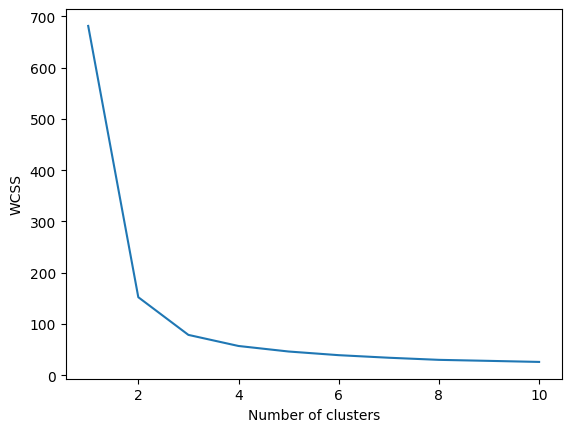

In [68]:
# Generate elbow plot for WCSS vs number of clusters to determine best k value
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(k_range, wcss)

This shows the optimal k value for KMeans on this dataset is k = 4

In [69]:
# 2
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [70]:
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [71]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, random_state=11)

In [72]:
# Standardize the data and apply it to the train and test sets
stdScaler = StandardScaler()
stdScaler.fit(X_train)

X_train = stdScaler.transform(X_train)
X_test = stdScaler.transform(X_test)

In [73]:
# Apply PCA to the train and test sets
pca = PCA(0.95)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [74]:
# Create and fit logistic regression model using the scaled data
logReg = LogisticRegression(solver='lbfgs')
logReg.fit(X_train, y_train)

nonPCA_score = logReg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
# Create and fit logistic regression model using the pca data
logReg = LogisticRegression(solver='lbfgs')
logReg.fit(X_train_pca, y_train)

PCA_score = logReg.score(X_test_pca, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
print(f"{'Non-PCA accuracy score': <22}: " + f'{nonPCA_score:.2%}')
print(f"{'PCA accuracy score': <22}: " + f'{PCA_score:.2%}')

Non-PCA accuracy score: 91.39%
PCA accuracy score    : 92.14%


On the last completion of the two logistic regression executions, the execution using pca data was 2.8 times faster than then one not using pca data (10s vs 28s).